In [1]:
import numpy as np

# Loading affinity dataset
dataset_filename = "affinity_dataset.txt"
X = np.loadtxt(dataset_filename)

In [2]:
# Checking dataset samples and features
n_samples, n_features = X.shape
print(f'Samples in dataset = {n_samples}')
print(f'Features in dataset = {n_features}')

Samples in dataset = 100
Features in dataset = 5


In [3]:
# Understanding the dataset
# Printing 5 of 100 samples to check their features
print(X[:5])

[[0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1.]]


In [4]:
# Turning numbers of dataset in words
features = ['bread', 'milk', 'cheese', 'apples', 'bananas']

In [5]:
# Checking rule: If a person buys Apples, they also buy Bananas.
# 1st) Checking the number of people who bought Apples
# 2nd) Checking the entire rule
num_apple_purchases = 0
rule_valid = 0
rule_invalid = 0
for sample in X:
    if sample[3] == 1:         # Which means the person bought Apple
        num_apple_purchases += 1
        if sample[4] == 1:     # Which means the person bought Banana as well
            rule_valid += 1
        else:
            rule_invalid += 1
print(f'{num_apple_purchases} people bought Apples')
print(f'{rule_valid} times the rule was valid')
print(f'{rule_invalid} time the rule was invalid')

43 people bought Apples
27 times the rule was valid
16 time the rule was invalid


In [6]:
# Now that I have the statistics of the rule I can compute support and confidence
# Support is simply the valid rules
support_ex = rule_valid

# To get confidence I should simply divide number of valid rules by the number of samples where Apple occurs and get the percentage of this
confidence_ex = rule_valid / num_apple_purchases

# Getting values
print(f'Support = {support_ex}')
print(f'Confidence = {confidence_ex:.3f} or {confidence_ex*100:.1f}%')

Support = 27
Confidence = 0.628 or 62.8%


In [7]:
# Setting up dictionaries to store all the results
from collections import defaultdict
valid_rules = defaultdict(int)
invalid_rules = defaultdict(int)
num_occurrences = defaultdict(int)

In [8]:
# Computing values in a large loop:
# 1st: Iterate over each sample in the dataset then loop over each feature as a premise
# 2nd: Loop again over each feature as a possible conclusion, mapping relashionship premise to conclusion
# If sample contains a person who bought the premise and the conclusion we record this in valid_rules.
# If they did not purchase the conclusion product, we record in invalid_rules
for sample in X:
    for premise in range(n_features):
        if sample[premise] == 0:
            continue
        num_occurrences[premise] += 1
        for conclusion in range(n_features):
            if premise == conclusion:
                continue
            if sample[conclusion] == 1:
                valid_rules[(premise, conclusion)] += 1
            else:
                invalid_rules[(premise, conclusion)] += 1

In [9]:
# Now that I have the statistics of all rules I can compute support and confidence as before
support = valid_rules
confidence = defaultdict(float)
for premise, conclusion in valid_rules.keys():
    rule = (premise, conclusion)
    confidence[rule] = valid_rules[rule] / num_occurrences[premise]


In [10]:
# Printing all the possible rules in a readable format. 
# Signature of the rule takes the premise and conclusion indices, the support and confidence dictionaries, and the features array to tell us what the features mean.
for premise, conclusion in confidence:
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    rule = (premise, conclusion)
    print(f'Rule: If a person buys {premise_name} they will also buy {conclusion_name}')
    print(f'- Confidence: {confidence[rule]:.3f} or {confidence[rule]*100:.1f}%')
    print(f'- Support: {support[rule]}')
    print('')

Rule: If a person buys bread they will also buy milk
- Confidence: 0.464 or 46.4%
- Support: 13

Rule: If a person buys milk they will also buy bread
- Confidence: 0.250 or 25.0%
- Support: 13

Rule: If a person buys cheese they will also buy bananas
- Confidence: 0.513 or 51.3%
- Support: 20

Rule: If a person buys bananas they will also buy cheese
- Confidence: 0.351 or 35.1%
- Support: 20

Rule: If a person buys cheese they will also buy apples
- Confidence: 0.564 or 56.4%
- Support: 22

Rule: If a person buys apples they will also buy cheese
- Confidence: 0.512 or 51.2%
- Support: 22

Rule: If a person buys apples they will also buy bananas
- Confidence: 0.628 or 62.8%
- Support: 27

Rule: If a person buys bananas they will also buy apples
- Confidence: 0.474 or 47.4%
- Support: 27

Rule: If a person buys milk they will also buy apples
- Confidence: 0.346 or 34.6%
- Support: 18

Rule: If a person buys apples they will also buy milk
- Confidence: 0.419 or 41.9%
- Support: 18

Rule: 

In [11]:
# Defining print_rule method
def print_rule(premise, conclusion, support, confidence, features):
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    rule = (premise, conclusion)
    print(f'Rule: If a person buys {premise_name} they will also buy {conclusion_name}')
    print(f' - Support: {support[rule]}')
    print(f' - Confidence: {confidence[rule]:.3f} or {confidence[rule]*100:.1f}%')
    print('')

In [12]:
from operator import itemgetter

In [13]:
# TOP 5 RULES SORTED BY SUPPORT
sorted_support = sorted(support.items(), key=itemgetter(1), reverse=True)
for index in range(5):
    print(f'Rule #{index+1}')
    (premise, conclusion) = sorted_support[index][0]
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: If a person buys apples they will also buy bananas
 - Support: 27
 - Confidence: 0.628 or 62.8%

Rule #2
Rule: If a person buys bananas they will also buy apples
 - Support: 27
 - Confidence: 0.474 or 47.4%

Rule #3
Rule: If a person buys milk they will also buy bananas
 - Support: 27
 - Confidence: 0.519 or 51.9%

Rule #4
Rule: If a person buys bananas they will also buy milk
 - Support: 27
 - Confidence: 0.474 or 47.4%

Rule #5
Rule: If a person buys cheese they will also buy apples
 - Support: 22
 - Confidence: 0.564 or 56.4%



In [14]:
# TOP 5 RULES SORTED BY CONFIDENCE
sorted_confidence = sorted(confidence.items(), key=itemgetter(1), reverse=True)
for index in range(5):
    print(f'Rule #{index+1}')
    (premise, conclusion) = sorted_confidence[index][0]
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: If a person buys apples they will also buy bananas
 - Support: 27
 - Confidence: 0.628 or 62.8%

Rule #2
Rule: If a person buys bread they will also buy bananas
 - Support: 16
 - Confidence: 0.571 or 57.1%

Rule #3
Rule: If a person buys cheese they will also buy apples
 - Support: 22
 - Confidence: 0.564 or 56.4%

Rule #4
Rule: If a person buys milk they will also buy bananas
 - Support: 27
 - Confidence: 0.519 or 51.9%

Rule #5
Rule: If a person buys cheese they will also buy bananas
 - Support: 20
 - Confidence: 0.513 or 51.3%



In [15]:
# Configuring Notebook to display graphics inline
%matplotlib inline

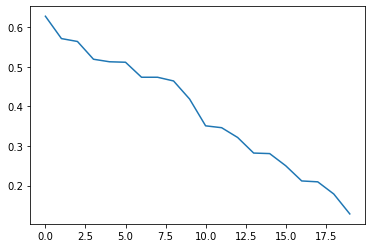

In [16]:
# Simple line plot showing the confidence values of the rules in order of confidence
from matplotlib import pyplot as plt
plt.plot([confidence[rule[0]] for rule in sorted_confidence])